<a href="https://colab.research.google.com/github/baihuaxie/ml_tutorial/blob/master/Keras_00_ML_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example #1: build sequential model on mnist dataset

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data('C:/Users/bhxie/Desktop/Jupyter/datasets/mnist.npz')

In [0]:
### pre-process data

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [0]:
### step-1: define a network model (Sequential)
network = models.Sequential()

In [0]:
### step-2: add layers
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

In [0]:
### step-3: compile network (initialize to instantiate a Python object)
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [43]:
### step-4: train (on the training set)
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 151us/sample - loss: 0.2521 - accuracy: 0.9270
Epoch 2/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.1029 - accuracy: 0.9694
Epoch 3/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0677 - accuracy: 0.9798
Epoch 4/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0492 - accuracy: 0.9850
Epoch 5/5
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0373 - accuracy: 0.9889


In [44]:
### step-5: evaluate (on the validation/test set)
network.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.07315696949705015, 0.9789]

In [0]:
### step-6: deploy (on the test set or application scenario)

Example #2: binary logistic regression on IMDB dataset

In [0]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data('C:/Users/bhxie/Desktop/Jupyter/datasets/imdb.npz', num_words=10000)

In [0]:
### transform input data into index vectors of the same length to represent variable lengths of sequences of words
### note: this is only done for feed-forward nets; for lstm, rnn, etc., no need to ensure sequence lengths are fixed?
import numpy as np

def vectorize_sequences(sequences, dimension=10000) :
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences) :
    results[i,sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
### construct training & validation sets

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
### build a feed-forward net

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

Note: after invoking fit() method, the model is already trained; if need to retrain, must re-run the compile() method

In [104]:
history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 9s 572us/sample - loss: 0.5075 - accuracy: 0.7889 - val_loss: 0.3799 - val_accuracy: 0.8721
Epoch 2/4
15000/15000 [==============================] - 3s 221us/sample - loss: 0.3034 - accuracy: 0.9037 - val_loss: 0.3049 - val_accuracy: 0.8847
Epoch 3/4
15000/15000 [==============================] - 3s 189us/sample - loss: 0.2214 - accuracy: 0.9277 - val_loss: 0.2783 - val_accuracy: 0.8896
Epoch 4/4
15000/15000 [==============================] - 3s 188us/sample - loss: 0.1743 - accuracy: 0.9461 - val_loss: 0.2763 - val_accuracy: 0.8889


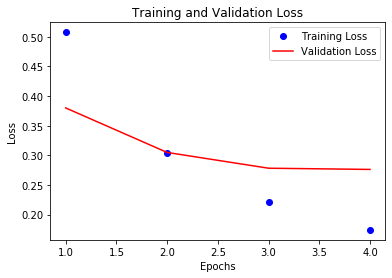

In [105]:
### plot training & validation loss

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = [ i+1 for i in history.epoch]

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

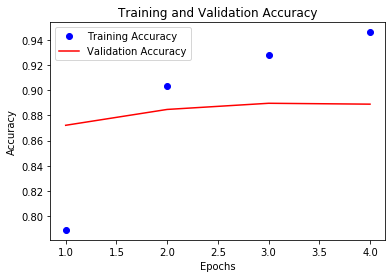

In [106]:
### plot training & validation accuracy

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The gap between training and validation accuracy is a clear experimental demonstration of over-fitting

In [102]:
model.evaluate(x_test,y_test)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.7340706412315369, 0.85004]

this is the model after training for 20 epochs => severe over-fitting degrades the test set performance

In [107]:
model.evaluate(x_test,y_test)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.2923336898994446, 0.88192]

this is the model after training for 4 epochs => minor over-fitting, test set performance is significantly improved over the 20 epochs case

In [108]:
model.predict(x_test)

array([[0.2741956 ],
       [0.99955606],
       [0.97403884],
       ...,
       [0.09985265],
       [0.16585258],
       [0.58750707]], dtype=float32)